# Correlation Coefficient

This a notebook that is being used to test the correlation coefficient functions in my statistical package

In [27]:
import sys
sys.path.append('C:/Users/Brendon/Dropbox/Scrypts/Statistics/python')

import statfunctions
reload(statfunctions)
import statfunctions as sf
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')
sns.set_style('white')

Here, we can generate correlated data with a certain length $N$ and a well defined correlation coefficient $r$

In [120]:
def generate_correlated_data(N, r):
    x = np.random.normal(size=(N,))
    y = np.random.normal(size=(N,)) + r * x / np.sqrt(1 - r**2)
    return x, y

N = 2000
x, y = generate_correlated_data(N, 0)
print statfunctions.correlation_coefficient(x, y)

N = 2000
x, y = generate_correlated_data(N, .5)
print statfunctions.correlation_coefficient(x, y)

(0.020983138833401881, 0.022363912153918631)
(0.47923035228504324, 0.017237343878972855)


Then, we can generate this data many times and calculate the correlation coefficient each time for `reps` repetitions

In [131]:
def generate_r_array(reps, N, r):
    
    rs  = []
    drs = []
    
    for i in range(reps):
        x, y = generate_correlated_data(N, r)

        R, dR = statfunctions.correlation_coefficient(x, y)

        rs.append(R)
        drs.append(dR)

    rs = np.array(rs)
    drs = np.array(drs)
    
    return rs, drs

Now we can study the accuracy and statistics of the correlation coefficient. Here, I am showing the calculated weighted mean of values for the correlation coefficient and histograms for the correlation coefficient in the case that $r=0$ and $r=.75$

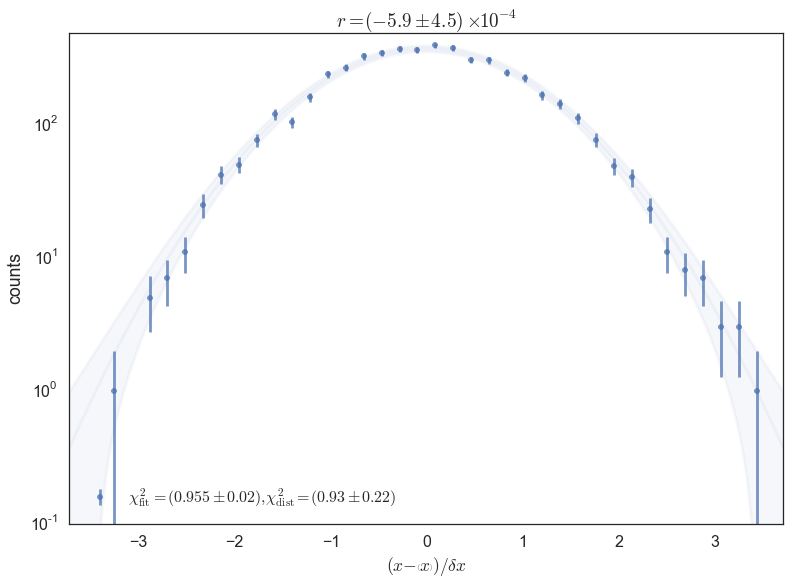

In [132]:
reps = 5000
N = 1000
r = 0

rs, drs = generate_r_array(reps, N, r)

sf.t_hist(rs,drs, ddof=1, yscale='log')
R, dR = sf.weighted_mean(rs, drs)
plt.title('$r = '+ sf.scientific_string(R, dR, style='latex') + '$')

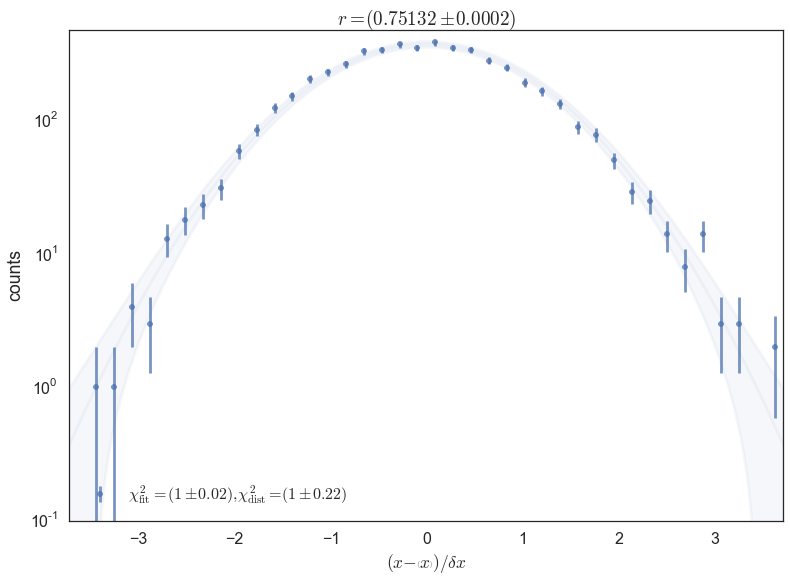

In [133]:
reps = 5000
N = 1000
r = .75

rs, drs = generate_r_array(reps, N, r)

sf.t_hist(rs,drs, ddof=1, yscale='log')
R, dR = sf.weighted_mean(rs, drs)
plt.title('$r = '+ sf.scientific_string(R, dR, style='latex') + '$')

In [2]:
def create_correlated_time_series(N, r, offset=1):
    factor = (1 + np.sqrt(1 - 4 * r**2)) / (2. * r)
    x = np.random.normal(size=(N + 1,))
    x = x[0:-offset] + factor * x[offset:] 
    return x

This is what correlated data looks like when the correlation offset is discrete

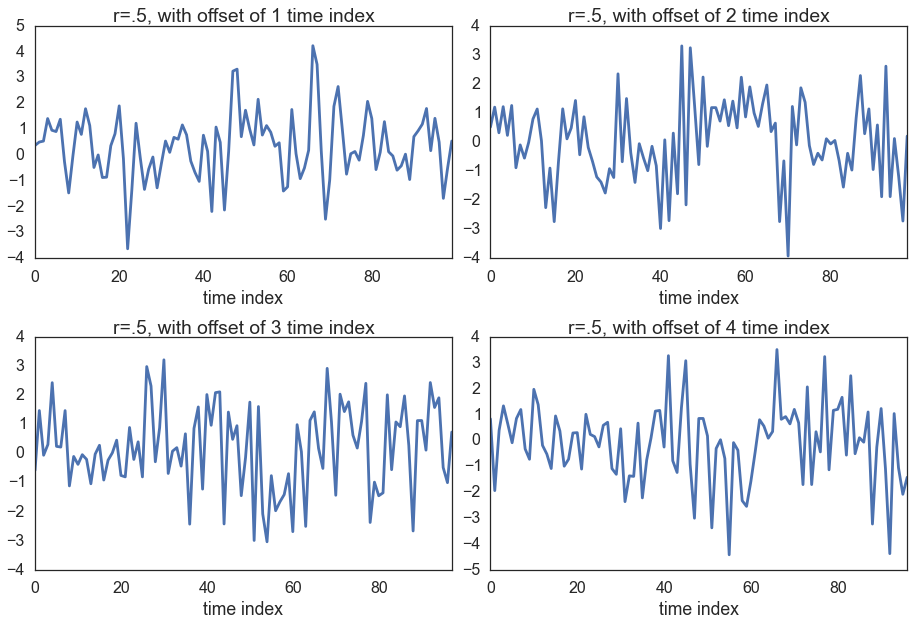

In [3]:
N = 100
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.plot(create_correlated_time_series(N, .5, offset = i + 1))
    plt.xlabel('time index')
    plt.title('r=.5, with offset of ' + str(i + 1) + ' time index')
    plt.xlim([0, N - i - 1])
plt.tight_layout()

This is what the autocorrelation function looks like when the autocorrelation length is discrete (note that the errors on the autocorrelation for various time offsets are correlated with each other)

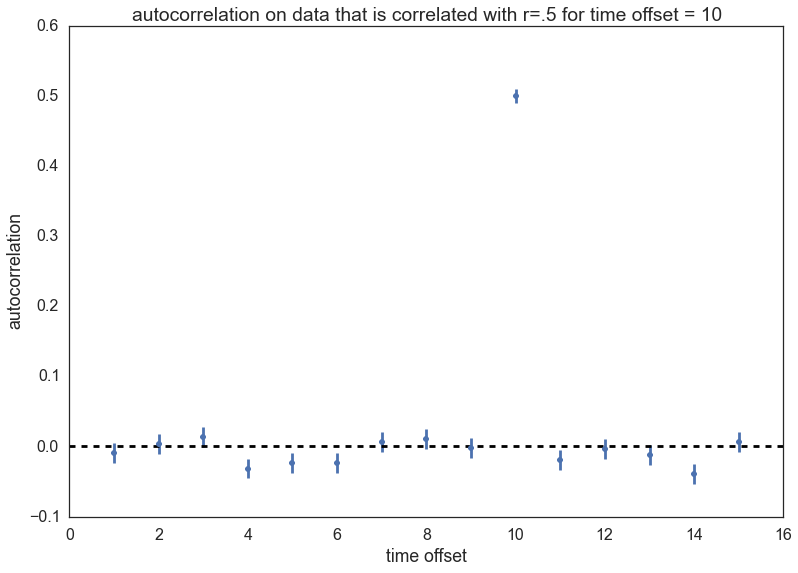

In [4]:
N = 5000
offsets = [i + 1 for i in range(15)]
r = .5

x = create_correlated_time_series(N, r, offset = 10)

a, da = statfunctions.autocorrelation(x, offsets=offsets)

plt.plot([0, max(offsets) + 1],[0, 0],'--k')
plt.errorbar(offsets, a, da, fmt='.')
plt.xlabel('time offset')
plt.ylabel('autocorrelation')
plt.title('autocorrelation on data that is correlated with r=.5 for time offset = 10')

This is what the autocorrelation function looks like with uncorrelated data

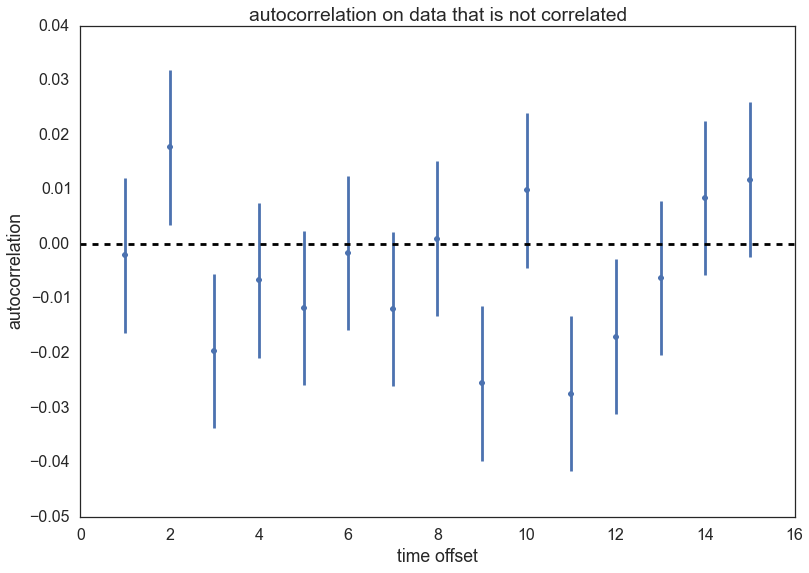

In [5]:
N = 5000
offsets = [i + 1 for i in range(15)]
r = .00001

x = create_correlated_time_series(N, r)

a, da = statfunctions.autocorrelation(x, offsets=offsets)

plt.plot([0, max(offsets) + 1],[0, 0],'--k')
plt.errorbar(offsets, a, da, fmt='.')
plt.xlim([0, max(offsets) + 1])
plt.xlabel('time offset')
plt.ylabel('autocorrelation')
plt.title('autocorrelation on data that is not correlated')

In [20]:
def create_long_time_correlated_series(N,duration = 10):
    x = np.random.normal(size=(N + duration))
    x = np.array([np.sum(x[i:i + duration]) for i in range(N)])
    return x

This is what the autocorrelation function looks like when there is a well defined correlation time

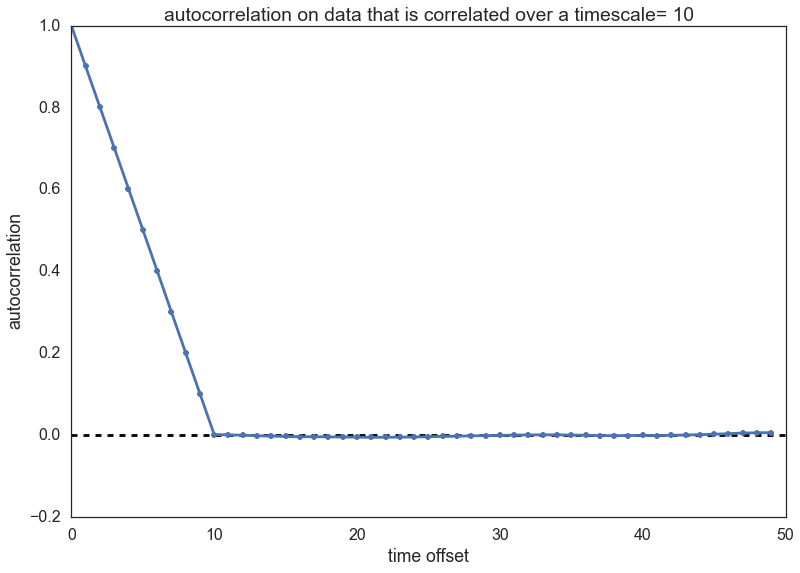

In [34]:
N = 500000
offsets = [i for i in range(50)]
r = .5

x = create_long_time_correlated_series(N)

a, da = statfunctions.autocorrelation(x, offsets=offsets)

plt.plot([0, max(offsets) + 1],[0, 0],'--k')
plt.errorbar(offsets, a, da, fmt='.-')
plt.xlim([0, max(offsets) + 1])
plt.xlabel('time offset')
plt.ylabel('autocorrelation')
plt.title('autocorrelation on data that is correlated over a timescale= 10')